In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt

# For NLP
import re
from nltk.corpus import stopwords #for stopwords
from nltk import word_tokenize   #for tokenization
from nltk.stem import WordNetLemmatizer  # for lemmatization
from nltk.probability import FreqDist  # Frequency distribution
from sklearn.feature_extraction.text import TfidfVectorizer # for feature extraction

#Modelling
from sklearn.model_selection import train_test_split #Splitting dataset into train and test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report 



In [2]:
df = pd.read_csv(r"F:\IVY\MACHINE LEARNING\Case Study\Hate Speech Detection\HateSpeechDataset.csv")

In [3]:
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [4]:
df.isnull().sum()

Content    0
Label      0
dtype: int64

In [5]:
df.duplicated().sum()

25046

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701073 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  701073 non-null  object
 1   Label    701073 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [9]:
df.describe(include="all")

,Content,Label
count,701073,701073.000000
unique,700067,NaN
top,what are you talking about,NaN
freq,2,NaN
mean,NaN,0.512211
std,NaN,0.499851
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


# TEXT PREPROCESSING

In [10]:
# Removing unnessarry punctuations using regular expression
df["Content2"]= df["Content"].apply(lambda x: re.findall('[^!.? ]+',x))

In [11]:
# Converting all words into small letter
df["Content2"]= df["Content"].apply(lambda x: x.lower())

In [12]:
# Removing Stopwords

# Load the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df["Content3"] = df["Content2"].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [15]:
from nltk import word_tokenize
df['Content_tokenized'] = df['Content3'].apply(word_tokenize)

In [16]:
df = df.drop(columns=['Content2', 'Content3'], axis=1)

In [18]:
from nltk.stem import WordNetLemmatizer

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each token in the 'Content_tokenized' column
df['Content_lemma'] = df['Content_tokenized'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [19]:
df.head()

,Content,Label,Content_tokenized,Content_lemma
0,denial of normal the con be asked to comment o...,1,"[denial, normal, con, asked, comment, tragedie...","[denial, normal, con, asked, comment, tragedy,..."
1,just by being able to tweet this insufferable ...,1,"[able, tweet, insufferable, bullshit, proves, ...","[able, tweet, insufferable, bullshit, prof, tr..."
2,that is retarded you too cute to be single tha...,1,"[retarded, cute, single, life]","[retarded, cute, single, life]"
3,thought of a real badass mongol style declarat...,1,"[thought, real, badass, mongol, style, declara...","[thought, real, badass, mongol, style, declara..."
4,afro american basho,1,"[afro, american, basho]","[afro, american, basho]"


[('article', 111606), ('slut', 98426), ('page', 91566), ('like', 89411), ('would', 72729), ('one', 72308), ('people', 70033), ('wikipedia', 67282), ('whatever', 59678), ('see', 56995), ('get', 54221), ('know', 52817), ('think', 52635), ('please', 51843), ('talk', 50557), ('time', 44301), ('make', 42843), ('fuck', 42484), ('go', 40542), ('also', 39411)]


<Axes: xlabel='Samples', ylabel='Counts'>

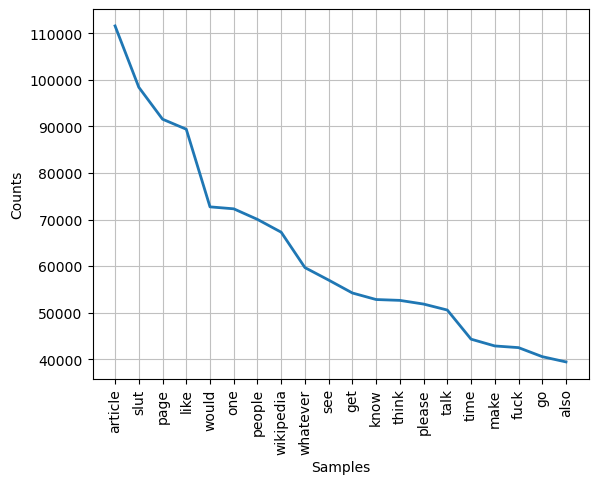

In [20]:
from nltk.probability import FreqDist

# Converting all the rows into one single list
all_tokens = [token for token_list in df["Content_lemma"] for token in token_list]

# Applying frequency distribution
freq_dist = FreqDist(all_tokens)

# Display the frequencies
print(freq_dist.most_common(20))

# Visualize the top 10 most common words
freq_dist.plot(20)

# FEATURE ENGINEERING

In [35]:
# Converting into numerical using TF-IDF and splitting into test and train

df["content_text"] = df['Content_lemma'].apply(lambda x: ' '.join(x))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content_text'], df['Label'], test_size=0.2, random_state=42)

# Initialize TfidfVectorizer with n-grams (unigrams and bigrams)
tfidf = TfidfVectorizer(ngram_range=(1, 2))  # Include unigrams and bigrams

# Fit on training data and transform both training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# MODEL BUILDING

In [ ]:

# Models and their parameters
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(), 'params': {}},
    {'name': 'Random Forest', 'model': RandomForestClassifier(), 'params': {'n_estimators': 100, 'max_depth': 5}},
    {'name': 'XGBoost', 'model': XGBClassifier(), 'params': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}}
]

# Results DataFrame
results = []

# Loop through models
for model_info in models:
    name = model_info['name']
    model = model_info['model']
    params = model_info['params']

    # Set parameters
    model.set_params(**params)

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    # Metrics
    Precision = precision_score(y_test, y_test_pred)
    Recall = recall_score(y_test, y_test_pred)

    F1_Score = f1_score(y_train, y_train_pred)
    Accuracy = accuracy_score(y_test, y_test_pred)

    # Collect results
    results.append({
        'Model Name': name,
        'Parameters': params,
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy
    })


# Convert to DataFrame
results_df = pd.DataFrame(results)

In [40]:
results_df

,Model Name,Parameters,Precision,Recall,F1_Score,Accuracy
0,Logistic Regression,{},0.835768,0.881452,0.903716,0.850209
1,Random Forest,"{'n_estimators': 100, 'max_depth': 5}",0.539433,0.992235,0.697869,0.561067
2,XGBoost,"{'n_estimators': 100, 'learning_rate': 0.1, 'm...",0.674866,0.895191,0.770538,0.724766


# Summary of Model Performance

Based on the evaluation metrics (Precision, Recall, F1-Score, and Accuracy), Logistic Regression appears to be the most suitable model for our hate speech detection task.

Key Considerations:
* Recall is crucial: Since correctly identifying all instances of hate speech (minimizing false negatives) is paramount, Recall is a highly important metric.
* Logistic Regression demonstrates a strong balance between Precision and Recall, resulting in the highest F1-Score among the models.
* While Random Forest achieves the highest Recall, it suffers from significantly lower Precision, indicating a high number of false positive (incorrectly classifying non-hate speech as hate speech).

# Conclusion

Given our primary objective of minimizing false negatives (high Recall) while maintaining reasonable Precision, Logistic Regression emerges as the most promising model for our hate speech detection system.

# LOGISTIC REGRESSION

In [53]:
#Creating the logistic regression model
model = LogisticRegression(random_state=42)

model.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# Metrics
Precision = precision_score(y_test, y_test_pred)
Recall = recall_score(y_test, y_test_pred)

F1_Score = f1_score(y_train, y_train_pred)
Accuracy = accuracy_score(y_test, y_test_pred)



# MODEL EVALUATION

In [54]:

# Create classification report for logistic regression model
target_names = ['Not hate speech', 'Hate Speech']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                 precision    recall  f1-score   support

Not hate speech       0.87      0.82      0.84     68227
    Hate Speech       0.84      0.88      0.86     71988

       accuracy                           0.85    140215
      macro avg       0.85      0.85      0.85    140215
   weighted avg       0.85      0.85      0.85    140215




* The Logistic Regression model demonstrates a good overall performance in classifying hate speech. It shows a well-balanced performance across both classes, with relatively high Precision and Recall scores for both "Not Hate Speech" and "Hate Speech." This indicates that the model effectively identifies both positive and negative instances of hate speech with reasonable accuracy.

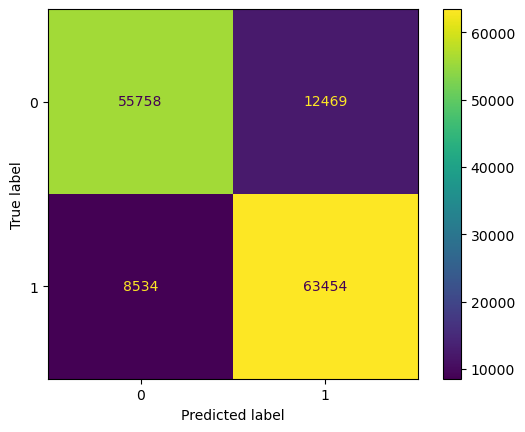

In [ ]:
# CONFUSION MATRIX

#Creating the confusion matrix for our logistic regression
log_cm = confusion_matrix(y_test, y_test_pred, labels = model.classes_)

# Creating Display of our confusion matrix
log_disp = ConfusionMatrixDisplay(log_cm, display_labels = model.classes_)

#Plotting the confusion matrix
log_disp.plot(values_format = '')

#Displat plot
plt.show()


#### We can see from the classification table that our model can predict true Positives better than true negatives. So its good at predicting if a comment has hate speech

* True Negatives = 55758 (correctly predicting non hate speech)
* True Positives = 63454  (correctly predicting hate speech)
* False Negatives = 12469 (incorrectly predicting non hate speech)
* False Positives = 8534 (incorrectly predicting hate speech)
